<a href="https://colab.research.google.com/github/aysoukr/Deep_learning/blob/main/CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn

In [ ]:
Normalize_transform= transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))])

In [ ]:
train_datasets= datasets.CIFAR10(
       root='./CIFAR10/Train',
       train= True,
       transform=Normalize_transform,
       download=True
)
test_datasets= datasets.CIFAR10(
       root='./CIFAR10/Test',
       train= False,
       transform=Normalize_transform,
       download=True
)

100%|██████████| 170498071/170498071 [00:04<00:00, 37580194.74it/s]


Extracting ./CIFAR10/Train/cifar-10-python.tar.gz to ./CIFAR10/Train


100%|██████████| 170498071/170498071 [00:03<00:00, 46429040.40it/s]


Extracting ./CIFAR10/Test/cifar-10-python.tar.gz to ./CIFAR10/Test


In [ ]:
Batch_size=256
train_loader=DataLoader(train_datasets,batch_size=Batch_size)
test_loader=DataLoader(test_datasets,batch_size=Batch_size)

In [ ]:
dataiter= iter(train_loader)
image, label= next(dataiter)

plt.imshow(np.transpose(torchvision.utils.make_grid(image[:25], normalize=True, padding=1, nrow=5).numpy(), (1,2,0)))
plt.axis('off')

In [ ]:
classes= []
for i, data in enumerate(train_loader):
  x,y= data
  classes.extend(y.tolist())

Text(0, 0.5, 'Counts')

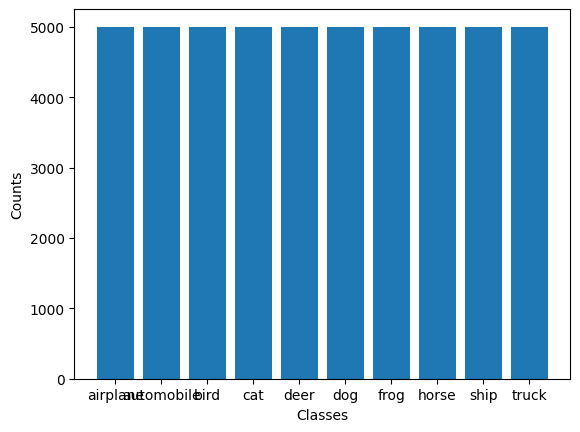

In [ ]:
unique, count= np.unique(classes, return_counts=True)
name=list(test_datasets.class_to_idx.keys())

plt.bar(name,count)
plt.xlabel('Classes')
plt.ylabel('Counts')

In [ ]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.model= nn.sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size= 3, padding=1),
    nn.LeakyReLU(0.01),
    nn.MaxPool2d(kernel_size=2), #32*16*16

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size= 3, padding=1),
    nn.LeakyReLU(0.01),
    nn.MaxPool2d(kernel_size=2), 
    
    nn.Conv2d(in_channels=64, out_channels=64, kernel_size= 3, padding=1),
    nn.LeakyReLU(0.01),
    nn.MaxPool2d(kernel_size=2),
    
    nn.Flatten(),
    nn.Linear(64*4*4, 512),
    nn.LeakyReLU(0.01),
    nn.Linear(512,10)

    
)

  def forward(self,x):

    return self.model(x)

In [ ]:
model

Classifier(
  (CNN1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatt): Flatten(start_dim=1, end_dim=-1)
  (FC1): Linear(in_features=16384, out_features=256, bias=True)
  (relu2): ReLU()
  (FC2): Linear(in_features=256, out_features=10, bias=True)
)

**Testing**

In [ ]:
a= torch.randn(3,32,32)
CNN1= nn.Conv2d(in_channels=3, out_channels=64, kernel_size= 3, padding=1)


In [ ]:
b= CNN1(a)
b.shape

torch.Size([64, 32, 32])

In [ ]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model= Classifier().to(device)

AttributeError: ignored

In [ ]:
model

Classifier(
  (CNN1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatt): Flatten(start_dim=1, end_dim=-1)
  (FC1): Linear(in_features=16384, out_features=256, bias=True)
  (relu2): ReLU()
  (FC2): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
def count_parameter(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print(f'The model has {count_parameter(model):,} trainable parameters ')

The model has 4,198,922 trainable parameters 


In [ ]:
epochs=10
lr=0.001
criterion= nn.CrossEntropyLoss()
opimizer= torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_loss_list=[]
for epoch in range (epochs):
  print(f'Epoch{epoch+1}')
  train_loss=0

  model.train()
  for i, (images, labels) in enumerate (train_loader):
    images= images.to(device)
    labels= labels.to(device)
    

    output= model(images)
    loss= criterion(output, labels)

    opimizer.zero_grad()
    loss.backward()
    opimizer.step()
    train_loss+=loss.item()

  train_loss_list.append(train_loss/len(train_loader))
  print(f'Training Loss ={train_loss_list[-1]}')



Epoch1
Training Loss =0.9432004854387167
Epoch2
Training Loss =0.8735280702916943
Epoch3
Training Loss =0.8415668275283308
Epoch4
Training Loss =0.8329254361439724
Epoch5
Training Loss =0.8182956430376792
Epoch6
Training Loss =0.7864434831604665
Epoch7
Training Loss =0.7671947959734469
Epoch8
Training Loss =0.7526160770533036
Epoch9
Training Loss =0.7483681624337118
Epoch10
Training Loss =0.705891987803031


Text(0, 0.5, 'Training Loss')

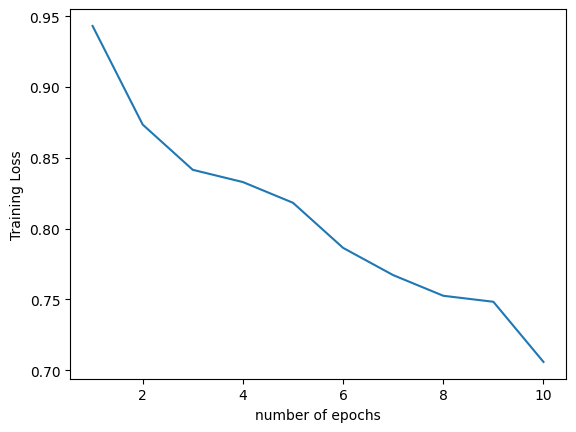

In [ ]:
plt.plot(range(1, epochs+1),train_loss_list)
plt.xlabel("number of epochs")
plt.ylabel("Training Loss")

In [ ]:
test_acc=0
model.eval()
with torch.no_grad():
  for I, (image, label) in enumerate (test_loader):
    image, label= image.to(device) , label.to(device)
    outputs= model(image)

    _ , y_pred=torch.max(outputs,1)
    test_acc= (y_pred==label).sum().item()

  print(f'test accuracy is {100*test_acc/len(test_datasets)}%')

RuntimeError: ignored